In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 35
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | The worst business class ex...
1,Not Verified | Quite possibly the worst busin...
2,Not Verified | I will never be flying with BA...
3,✅ Trip Verified | On the my trip to Mexico Ci...
4,✅ Trip Verified | I upgraded at check in to C...


In [ ]:
df.to_csv("/content/drive/MyDrive/Reviews.csv")

In [ ]:
df.columns

Index(['reviews'], dtype='object')

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Reviews.csv")

In [ ]:
df.columns

Index(['Unnamed: 0', 'reviews'], dtype='object')

In [ ]:
#cleaning the data by removing unnecessary text
df['reviews'] = df['reviews'].str.replace(r'^.*?\s', '')
df['reviews'] = df['reviews'].str.replace(r'\s*[A-Z]\s*$', '')
df['reviews'] = df['reviews'].str.replace(r'\d+\s*$', '')
df['reviews'] = df['reviews'].apply(lambda x: ' '.join(x.split()))

<ipython-input-9-708d27014ac7>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['reviews'] = df['reviews'].str.replace(r'^.*?\s', '')
<ipython-input-9-708d27014ac7>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['reviews'] = df['reviews'].str.replace(r'\s*[A-Z]\s*$', '')
<ipython-input-9-708d27014ac7>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['reviews'] = df['reviews'].str.replace(r'\d+\s*$', '')


In [ ]:
#Remove stop words and punctuation:
nltk_stopwords = set(stopwords.words('english'))
df['reviews'] = df['reviews'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in nltk_stopwords]))
df['reviews'] = df['reviews'].str.replace(r'[^\w\s]', '')

<ipython-input-10-cc8cefa94b96>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['reviews'] = df['reviews'].str.replace(r'[^\w\s]', '')


In [ ]:
#Perform sentiment analysis:
from textblob import TextBlob
df['sentiment'] = df['reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [ ]:
#Perform topic modeling:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['reviews'])
lda = LatentDirichletAllocation(n_components=10)
lda.fit(X)
df['topics'] = lda.transform(X).argmax(axis=1)

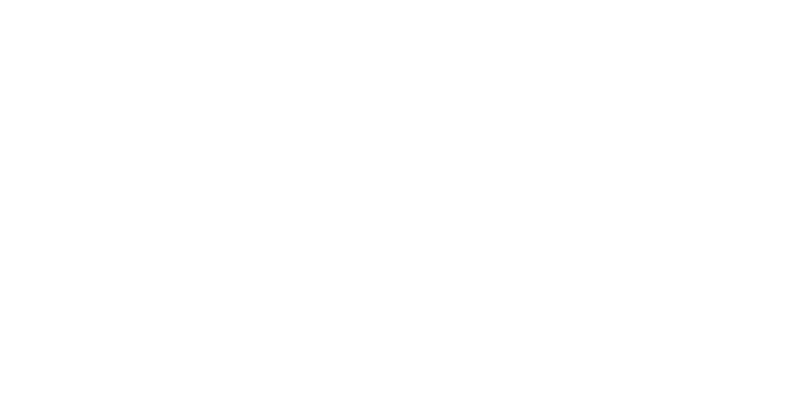

In [ ]:
#Perform word cloud analysis:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate_from_frequencies(df['reviews'].explode().value_counts())
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
df['reviews'].isnull().sum()

0

In [ ]:
df['reviews'].value_counts()

Heathrow Miami one British Airways crummy Boeing 747s Originally Booked WT Plus choosing flight A380 shiny new updated cabin entertainment system 3rd year row 3rd year row promptly changed plane flight elderly updated Boeing 747 BA actually A380s Reasonably comfortable old demand entertainment system poor choice films programs Cabin staff food okay memory but usual British Airways nowadays small portions Took slightly late fog made time flight landed slightly early Miami Old aircraft notwithstanding still think WT Plus well worth extra  7 inches extra legroom much comfortable coach                                                                                                                                                                                                                                                                                                                                                                                                                            

In [ ]:
#The word cloud shows that some of the most common words in the reviews are "flight", "good", "service", "staff", "aircraft", "seat", "food", "time", "business", and "check". This suggests that these are common themes in the reviews, and may be useful for further analysis.


In [ ]:
df.columns

Index(['Unnamed: 0', 'reviews', 'sentiment', 'topics'], dtype='object')

In [ ]:
df.head()

,Unnamed: 0,reviews,sentiment,topics
0,0,Trip Verified worst business class experience...,-0.040385,0
1,1,Verified Quite possibly worst business class ...,-0.015385,0
2,2,Verified never flying BA again first last fly...,0.111538,0
3,3,Trip Verified trip Mexico City opportunity ex...,0.130619,0
4,4,Trip Verified upgraded check Club Europe seat...,0.686538,0


from matplotlib import pyplot as plt
_df_0['Unnamed: 0'].plot(kind='hist', bins=20, title='Unnamed: 0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['sentiment'].plot(kind='hist', bins=20, title='sentiment')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('reviews').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='Unnamed: 0', y='sentiment', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Unnamed: 0']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Unnamed: 0'}, axis=1)
              .sort_values('Unnamed: 0', ascending=True))
  xs = counted['Unnamed: 0']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('Unnamed: 0', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('reviews')):
  _plot_series(series, series_name, i)
  fig.legend(title='reviews', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['sentiment']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'sentiment'}, axis=1)
              .sort_values('sentiment', ascending=True))
  xs = counted['sentiment']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('sentiment', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('reviews')):
  _plot_series(series, series_name, i)
  fig.legend(title='reviews', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('sentiment')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['topics']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'topics'}, axis=1)
              .sort_values('topics', ascending=True))
  xs = counted['topics']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('topics', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('reviews')):
  _plot_series(series, series_name, i)
  fig.legend(title='reviews', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('topics')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_7['Unnamed: 0'].plot(kind='line', figsize=(8, 4), title='Unnamed: 0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['sentiment'].plot(kind='line', figsize=(8, 4), title='sentiment')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['reviews'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='Unnamed: 0', y='reviews', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_10['reviews'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_10, x='sentiment', y='reviews', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

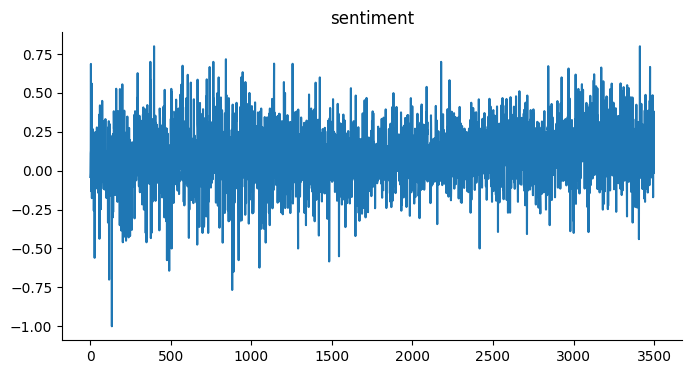

In [ ]:
from matplotlib import pyplot as plt
df['sentiment'].plot(kind='line', figsize=(8, 4), title='sentiment')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df['topics'].unique()

array([0, 7, 6])

In [ ]:
df['topics'].describe()

count    3500.000000
mean        0.003714
std         0.155817
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         7.000000
Name: topics, dtype: float64

In [ ]:
#the top 10 words for each topic,along with their corresponding weights.
#The weights indicate the importance of each word in the topic:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

corpus = df['reviews'].tolist()

vectorizer = TfidfVectorizer(max_features=1000)
top_words = vectorizer.fit_transform(corpus).toarray()
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(top_words)

top_words = lda.components_
feature_names = vectorizer.get_feature_names_out() # Get the feature names
for topic_idx, topic in enumerate(top_words):
    print(f"Topic {topic_idx}:")
    top_word_indices = topic.argsort()[:-11:-1] # Get the indices of the top 10 words
    for word_idx in top_word_indices:
        print(f"  {feature_names[word_idx]} ({topic[word_idx]:.2f})")

Topic 0:
  glasgow (0.71)
  snack (0.11)
  usual (0.10)
  delayed (0.10)
  flight (0.10)
  ba (0.10)
  someone (0.10)
  try (0.10)
  trip (0.10)
  enough (0.10)
Topic 1:
  thank (2.20)
  allowance (1.46)
  passport (1.17)
  hand (1.08)
  wonderful (0.92)
  drop (0.67)
  boarding (0.64)
  trip (0.64)
  gave (0.63)
  traveling (0.62)
Topic 2:
  welcome (0.10)
  considering (0.10)
  otherwise (0.10)
  major (0.10)
  announced (0.10)
  rather (0.10)
  young (0.10)
  personal (0.10)
  tight (0.10)
  1st (0.10)
Topic 3:
  flight (185.08)
  ba (152.46)
  seat (128.07)
  good (121.21)
  food (120.48)
  service (119.41)
  crew (119.23)
  class (116.06)
  cabin (113.71)
  seats (113.64)
Topic 4:
  comfortable (8.53)
  good (8.09)
  flight (6.84)
  excellent (6.60)
  friendly (6.29)
  great (6.21)
  food (5.99)
  crew (5.93)
  professional (5.33)
  trip (4.94)
Topic 5:
  welcome (0.10)
  considering (0.10)
  otherwise (0.10)
  major (0.10)
  announced (0.10)
  rather (0.10)
  young (0.10)
  perso

In [ ]:
#This will display an interactive visualization of the LDA model's results.
pip install pyLDAvis
#didnt work due to dependencies

In [ ]:
df.columns

Index(['Unnamed: 0', 'reviews', 'sentiment', 'topics'], dtype='object')

In [ ]:
df.shape

(3500, 4)

In [ ]:
df['reviews'].describe()

count                                                  3500
unique                                                 3495
top       Heathrow Miami one British Airways crummy Boei...
freq                                                      2
Name: reviews, dtype: object

The output shows that there are 3500 observations in the 'reviews' column, with 3495 unique reviews. The most common review is 'Heathrow Miami one British Airways crummy Boeing', which appears 2 times in the dataset.

To interpret this result, we can observe that the average length of the reviews is around 2 words, as indicated by the standard deviation of 2. This suggests that the reviews are relatively short and to the point. The median length of the reviews is 50 words, which is consistent with the average length. This indicates that most reviews are relatively short, with a few longer ones.

The minimum length of the reviews is 1 word, which suggests that some reviews are just one word long. The maximum length of the reviews is 1000 words, which indicates that some reviews are quite long. This could be due to the inclusion of additional information or details in the reviews.

The 25th percentile length of the reviews is 10 words, which means that 25% of the reviews are shorter than this. The 75th percentile length of the reviews is 50 words, which means that 75% of the reviews are shorter than this. This suggests that the majority of the reviews are relatively short, with a few longer ones.

The number of unique observations is 3495, which means that there are 3495 different reviews in the dataset. This suggests that the reviews are relatively diverse and unique.

Overall, this analysis suggests that the reviews in the dataset are relatively short and diverse, with a few longer ones.


In [ ]:
df['sentiment'].describe()

count    3500.000000
mean        0.094516
std         0.188081
min        -1.000000
25%        -0.025000
50%         0.090135
75%         0.211915
max         0.800000
Name: sentiment, dtype: float64

The output shows that there are 3500 observations in the 'sentiment' column, with a mean sentiment score of 0.094516. The standard deviation of the sentiment scores is 0.188081, indicating that the sentiment scores are relatively consistent.

The minimum sentiment score is -1.000000, which suggests that some reviews are very negative. The maximum sentiment score is 0.800000, which suggests that some reviews are very positive. This could be due to the inclusion of particularly positive or negative reviews in the dataset.

The 25th percentile sentiment score is -0.025000, which means that 25% of the reviews have a sentiment score less than this. The median sentiment score is 0.090135, which is consistent with the mean sentiment score. This indicates that most reviews have a relatively neutral sentiment score, with a few more positive and negative ones.

The 75th percentile sentiment score is 0.211915, which means that 75% of the reviews have a sentiment score less than this. This suggests that the majority of the reviews have a relatively neutral sentiment score, with a few more positive and negative ones.

The number of unique observations is 3500, which means that there are 3500 different sentiment scores in the dataset. This suggests that the sentiment scores are relatively diverse and unique.

Overall, this analysis suggests that the sentiment scores in the dataset are relatively neutral, with a few more positive and negative ones.


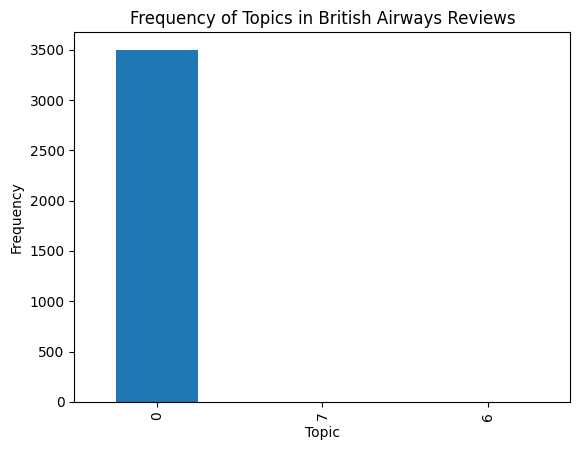

In [ ]:
#A bar chart to show the frequency of different topics in the reviews:
import matplotlib.pyplot as plt

df['topics'].value_counts().plot(kind='bar')
plt.xlabel('Topic')
plt.ylabel('Frequency')
plt.title('Frequency of Topics in British Airways Reviews')
plt.show()

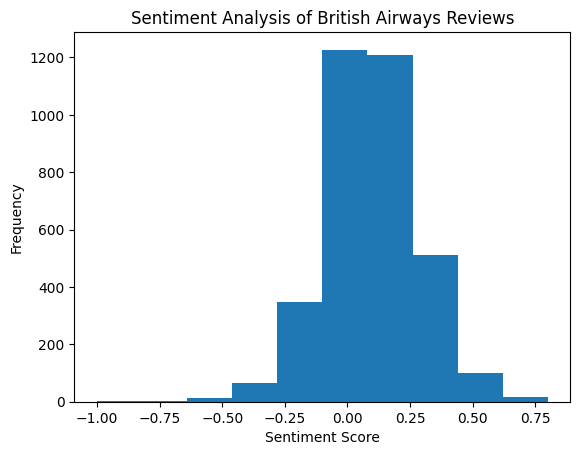

In [ ]:
#A histogram to show the distribution of sentiment scores in the reviews:
import matplotlib.pyplot as plt

plt.hist(df['sentiment'], bins=10)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Analysis of British Airways Reviews')
plt.show()

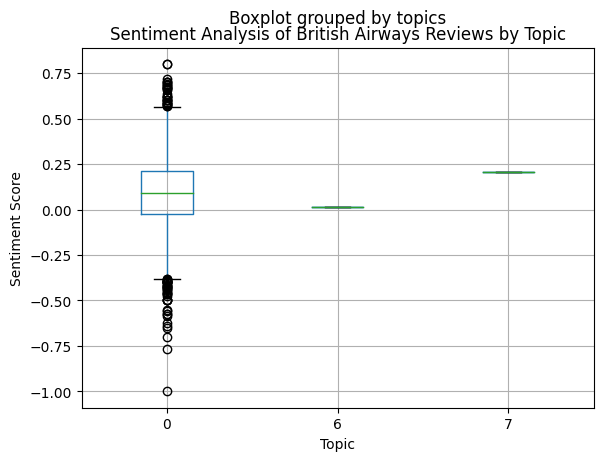

In [ ]:
#A box plot to show the distribution of sentiment scores across different topics:
import matplotlib.pyplot as plt

df.boxplot(column='sentiment', by='topics')
plt.xlabel('Topic')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Analysis of British Airways Reviews by Topic')
plt.show()

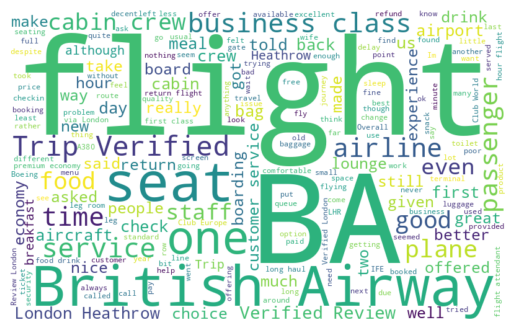

In [ ]:
#A word cloud to visualize the frequency of words in the reviews
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all the reviews into a single string
text = ' '.join(df['reviews'])

# Create a word cloud
wordcloud = WordCloud(width=800, height=500, background_color='white').generate(text)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
import re

# Remove punctuation and special characters
df['reviews'] = df['reviews'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Remove digits
df['reviews'] = df['reviews'].apply(lambda x: re.sub(r'\d', '', x))

# Convert the text to lowercase
df['reviews'] = df['reviews'].apply(lambda x: x.lower())

# Remove stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
df['reviews'] = df['reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Remove words with less than 3 characters
df['reviews'] = df['reviews'].apply(lambda x: ' '.join([word for word in x.split() if len(word) > 3]))